# EEG Signal Analysis for P300 Extraction

## [Arya Kouresh](https://github.com/AryaKoureshi)

### arya.koureshi@gmail.com

---


In [1]:
#%% Imports
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
import numpy as np
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")

In [2]:
#%% Load Data
data = scipy.io.loadmat('C:/Users/aryak/Downloads/Comp_HW4/ERP_EEG.mat')['ERP_EEG'].T

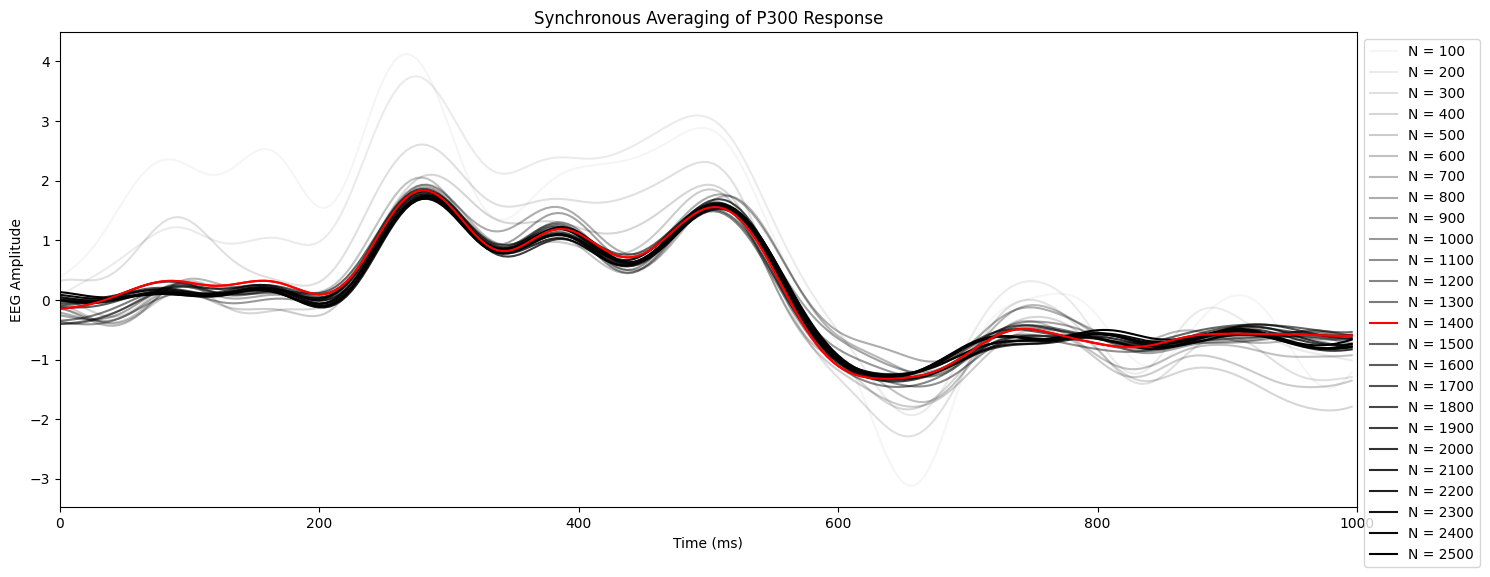

In [3]:
#%% part a
sampling_frequency = 240
stimulation_duration = 1  # sec
time_points = np.arange(0, sampling_frequency * stimulation_duration)

time_vector = time_points / sampling_frequency

Ns = np.arange(100, 2501, 100)

plt.figure(figsize=(15, 6))
for N in Ns:
    subset_data = data[:N, :]
    average_response = np.mean(subset_data, axis=0)
    if N == 1400:
        plt.plot(time_vector*1000, average_response, color='red', label=f'N = {N}')
    else:
        plt.plot(time_vector*1000, average_response, color='black', alpha=N / 2500.0, label=f'N = {N}')

N0 = 1400
subset_data = data[:N0, :]
average_response = np.mean(subset_data, axis=0)
plt.plot(time_vector*1000, average_response, color='red')

plt.xlabel('Time (ms)')
plt.ylabel('EEG Amplitude')
plt.title('Synchronous Averaging of P300 Response')
plt.xlim([0, 1000])
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

This figure shows the average response obtained from N samples for different values of N. The x-axis represents the time in miliseconds, and the y-axis represents the amplitude in microvolts. The figure has 24 lines, each with a different color and a label indicating the value of N. The lines show how the average response changes as N increases from 100 to 2500. The figure illustrates that the signal-to-noise ratio improves as N increases, and the P300 response becomes more visible and consistent around 300 ms after the stimulus onset. The figure is a result of applying synchronous averaging to the EEG_ERP data.

---

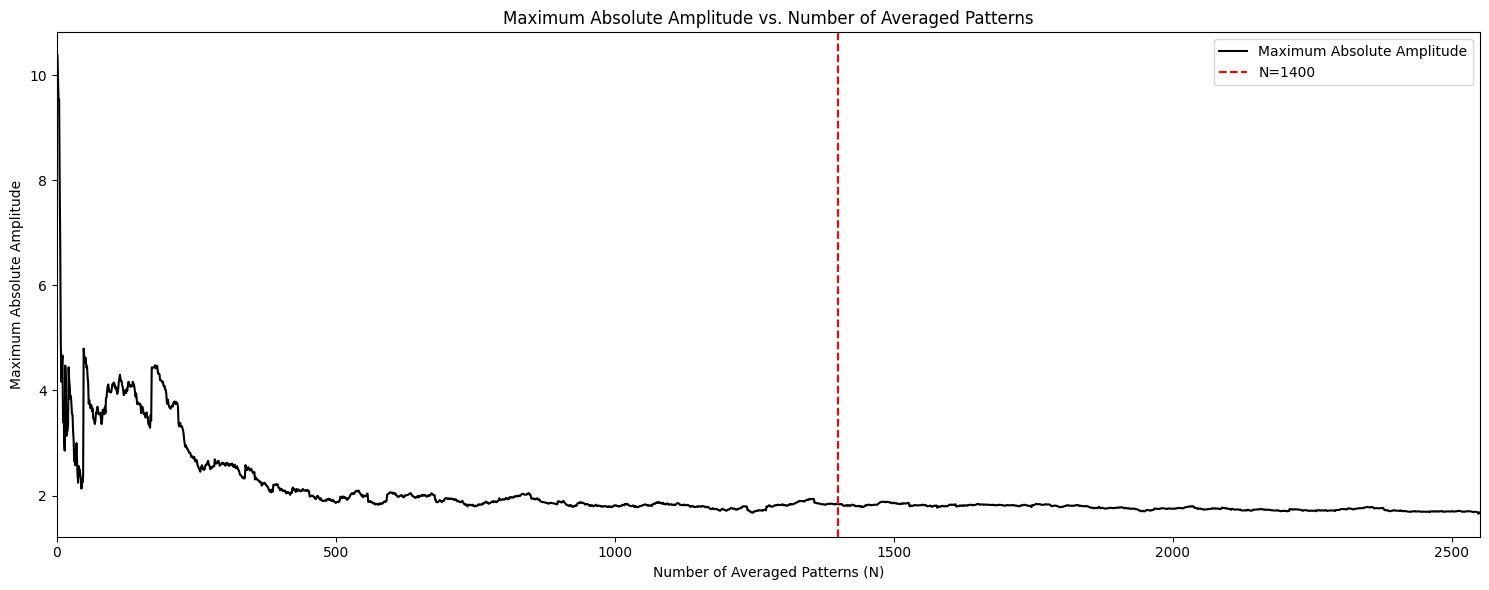

In [4]:
#%% part b
Ns = np.arange(1, 2551, 1)

max_amplitudes = []

for N in Ns:
    subset_data = data[:N, :]
    average_response = np.mean(subset_data, axis=0)
    # Calculate maximum absolute amplitude for each N
    max_amplitude = np.max(np.abs(average_response))
    max_amplitudes.append(max_amplitude)

plt.figure(figsize=(15, 6))
plt.plot(Ns, max_amplitudes, color='black', label='Maximum Absolute Amplitude')
plt.axvline(x=N0, color='r', linestyle='--', label=f'N={N0}')
plt.legend()
plt.xlabel('Number of Averaged Patterns (N)')
plt.ylabel('Maximum Absolute Amplitude')
plt.title('Maximum Absolute Amplitude vs. Number of Averaged Patterns')
plt.xlim([0, 2551])
plt.tight_layout()
plt.show()

---

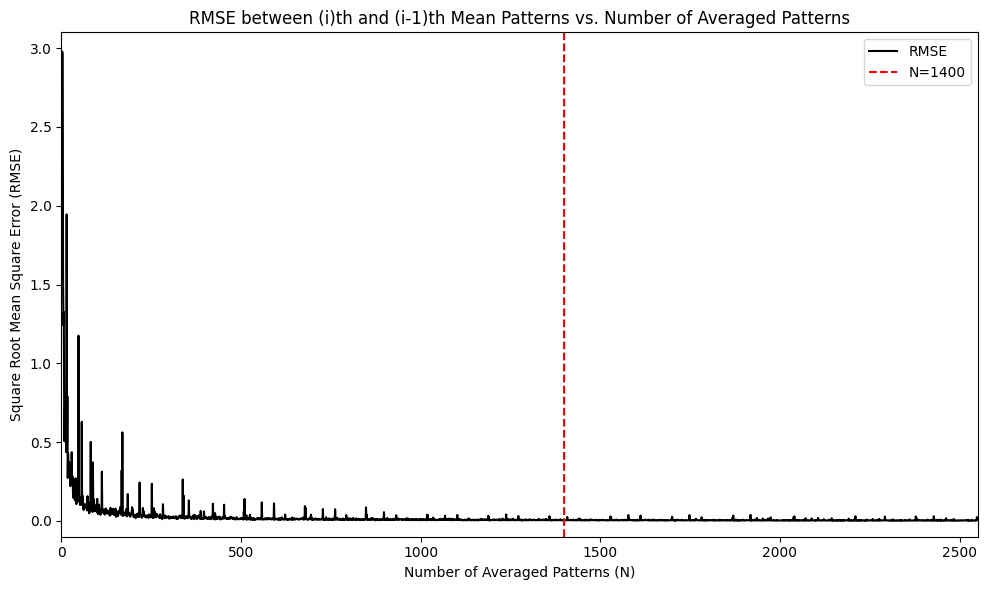

In [5]:
#%% part c
Ns = np.arange(2, 2551, 1)  # Starting from 2 to calculate RMSE with previous mean pattern
rmse_values = []

for N in Ns:
    subset_data = data[:N, :]
    
    current_mean_response = np.mean(subset_data, axis=0)
    if N > 2:
        previous_mean_response = np.mean(data[:N-1, :], axis=0)
        # Calculate the root mean square error
        rmse = np.sqrt(mean_squared_error(current_mean_response, previous_mean_response))
        rmse_values.append(rmse)

plt.figure(figsize=(10, 6))
plt.plot(Ns[1:], rmse_values, color='black', label='RMSE')
plt.axvline(x=N0, color='r', linestyle='--', label=f'N={N0}')
plt.legend()
plt.xlabel('Number of Averaged Patterns (N)')
plt.ylabel('Square Root Mean Square Error (RMSE)')
plt.title('RMSE between (i)th and (i-1)th Mean Patterns vs. Number of Averaged Patterns')
plt.xlim([0, 2551])
plt.ylim([-0.1, 3.1])
plt.tight_layout()
plt.show()

---

#### part d


**Determination of Optimal Number of Averaged Patterns (N0) for P300 Extraction**

In this analysis, we aimed to determine the optimal number of experiments (N0) from which the P300 response can be reliably extracted using synchronous averaging. The investigation involved three key aspects: the average response, maximum absolute amplitude, and the root mean square error (RMSE) between consecutive mean patterns.

1. **Average Response vs. Number of Averaged Patterns (N):**
   - Part (a) involved plotting the average response against the number of averaged patterns. The graph revealed that the average response tends to stabilize around N = 1400, indicating that further increases in N may not significantly impact the averaged response.

2. **Maximum Absolute Amplitude vs. Number of Averaged Patterns (N):**
   - Part (b) focused on the maximum absolute amplitude of the signal in relation to the number of averaged patterns. The plot showed that the maximum absolute amplitude reaches a plateau around N = 1400, suggesting that beyond this point, the amplitude does not increase substantially.

3. **RMSE between (i)th and (i-1)th Mean Patterns vs. Number of Averaged Patterns (N):**
   - In part (c), we examined the root mean square error (RMSE) between consecutive mean patterns. The graph demonstrated that the RMSE stabilizes or increases slowly around N = 1400, indicating diminishing returns in terms of similarity between consecutive mean patterns beyond this point.

**Conclusion:**
Based on the comprehensive analysis of average response stability, maximum absolute amplitude, and RMSE trends, we have identified N0 = 1400 as the optimal number of experiments for extracting the P300 response. This value strikes a balance between capturing the relevant information in the signal and avoiding unnecessary computational burden associated with higher values of N.

The selected N0 provides a robust basis for synchronous averaging, ensuring that the extracted P300 response is representative of the underlying neural activity in response to the visual stimulus.

---

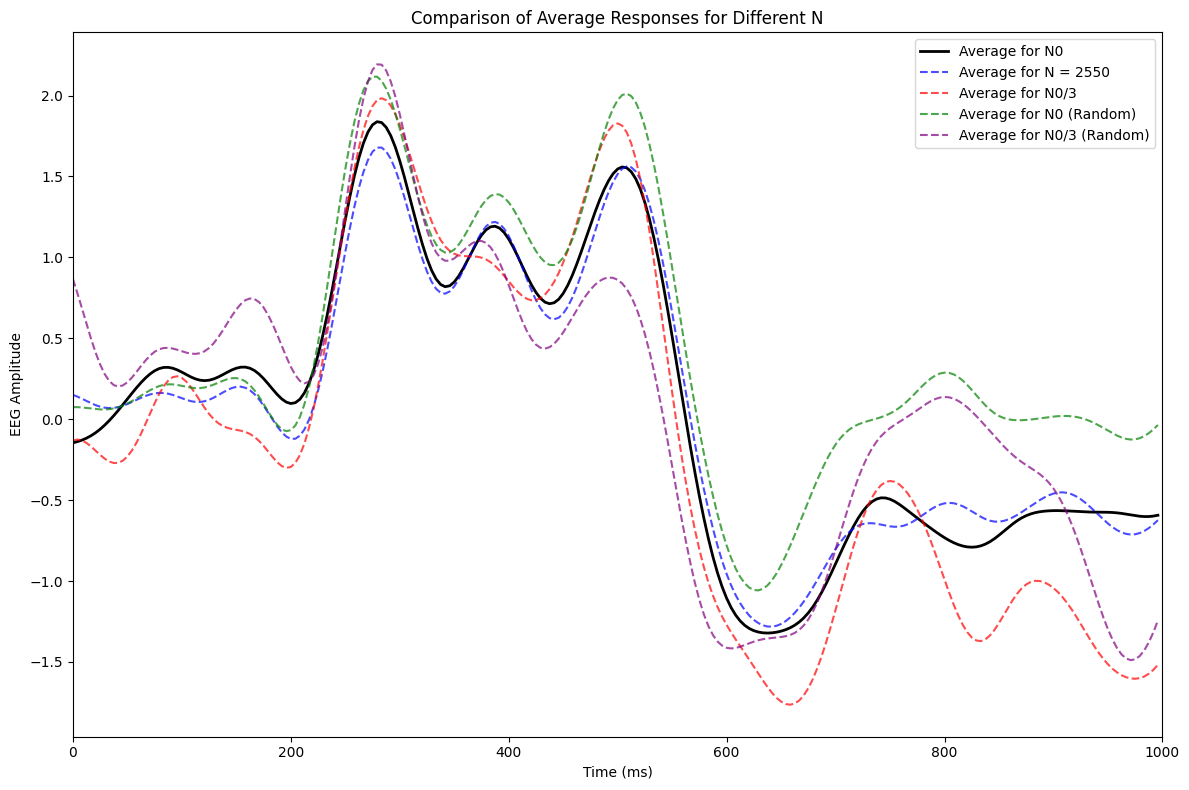

In [6]:
#%% part e
N0 = 1400

average_response_N0 = np.mean(data[:N0, :], axis=0)
average_response_N2550 = np.mean(data[:2550, :], axis=0)
average_response_N0_over_3 = np.mean(data[:N0 // 3, :], axis=0)

random_indices = np.random.choice(2550, size=N0, replace=False)
random_answers = data[random_indices, :]
average_response_N0_random = np.mean(random_answers, axis=0)
average_response_N0_over_3_random = np.mean(data[np.random.choice(2550, size=N0 // 3, replace=False), :], axis=0)

plt.figure(figsize=(12, 8))
plt.plot(time_vector*1000, average_response_N0, label='Average for N0', color='black', linewidth=2)
plt.plot(time_vector*1000, average_response_N2550, label='Average for N = 2550', linestyle='--', color='blue', alpha=0.7)
plt.plot(time_vector*1000, average_response_N0_over_3, label='Average for N0/3', linestyle='--', color='red', alpha=0.7)
plt.plot(time_vector*1000, average_response_N0_random, label='Average for N0 (Random)', linestyle='--', color='green', alpha=0.7)
plt.plot(time_vector*1000, average_response_N0_over_3_random, label='Average for N0/3 (Random)', linestyle='--', color='purple', alpha=0.7)
plt.xlabel('Time (ms)')
plt.ylabel('EEG Amplitude')
plt.title('Comparison of Average Responses for Different N')
plt.xlim([0, 1000])
plt.legend()
plt.tight_layout()
plt.show()

- **Average for N0 (solid black line)**: This line represents the average response for N0.
- **Average for N = 2550 (dashed red line)**: This line represents the average response when N equals 2550.
- **Average for N0/3 (dashed green line)**: This line represents the average response when N equals N0/3.
- **Average for N0 (Random) (dotted blue line)**: This line represents the average response obtained by selecting a random sample of size equal to N0 from 2550 answers.
- **Average for N0/3 (Random) (dotted purple line)**: This line represents the average response obtained by selecting a random sample of size equal to N0/3 from 2550 answers.

The x-axis of the graph is labeled "Time (ms)" and ranges from 0 to 1000 milliseconds. The y-axis is labeled "ERG Amplitude". All lines follow a similar pattern, peaking and dipping at approximately the same time intervals but with varying amplitudes. The graph shows that the average response for N0 and N = 2550 are quite similar, indicating that increasing the number of averaged patterns beyond N0 does not significantly enhance the accuracy of P300 extraction. The random selection of answers, both at N0 and N0/3, also aligns closely with their non-random counterparts but exhibits more variability. This suggests that N0 = 1400 is an optimal number for extracting the P300 response, as it strikes a balance between capturing the relevant information in the signal and avoiding unnecessary computational burden associated with higher values of N.

---


#### part f

In real experiments that utilize P300 signals for brain-computer interfaces (BCIs) or other applications, the number of repetitions of the P300 pattern can vary depending on the specific goals of the experiment, the characteristics of the signal, and the requirements of the application. Here are some general observations:

1. **Number of Repetitions in Real Experiments:**
   - The number of repetitions in P300-based experiments can range from a few trials to several dozen trials.
   - Commonly, researchers aim to strike a balance between obtaining a reliable P300 signal and avoiding excessive participant fatigue or prolonging the experimental session.

2. **Consistency with Previous Results:**
   - The number of repetitions used in real experiments may or may not align exactly with the results obtained in the previous sections (particularly part d, where N0 was determined).
   - Factors such as individual variability in participants, the specific nature of the experimental task, and the signal-to-noise ratio of the recorded EEG data can influence the optimal number of repetitions in a real-world scenario.

3. **Reasons for Differences:**
   - **Individual Variability:** Participants may exhibit varying degrees of P300 response amplitude and variability. Some individuals may require more repetitions to obtain a stable and reliable P300 signal.
   - **Experimental Task Complexity:** The complexity of the experimental task or stimulus presentation can impact the detectability of the P300 signal. More complex tasks might require additional repetitions to capture the relevant neural responses.
   - **Noise and Signal Quality:** The quality of the EEG signal, including the presence of noise or artifacts, can influence the number of repetitions needed. In some cases, more repetitions may be necessary to overcome signal variability or contamination.

4. **Adaptation to User-Specific Characteristics:**
   - BCIs or other applications based on P300 signals may adapt the number of repetitions based on user-specific characteristics. Some systems dynamically adjust the number of repetitions based on the user's performance or signal quality during the experiment.

5. **Practical Considerations:**
   - Practical considerations such as time constraints, participant comfort, and experimental design may also influence the choice of the number of repetitions. Researchers often aim for a balance that maximizes signal quality within the constraints of the experimental setup.

In summary, while the results obtained in the previous sections provide valuable insights into the trade-off between the number of averaged patterns (N) and the quality of the P300 signal, real-world experiments may involve additional considerations and adaptations based on the specific context and goals of the study. The optimal number of repetitions may vary across experiments and is often determined through a combination of empirical testing, pilot studies, and consideration of practical constraints.